In [2]:
%matplotlib widget
import time

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.animation import FuncAnimation
import datetime
import matplotlib.dates as mdates
from collections import deque
import numpy as np

import serial
import re

PORT = "COM3"

# How many sensor samples we want to store
HISTORY_SIZE = 25000000

# Pause re-sampling the sensor and drawing for INTERVAL seconds
INTERVAL = 0.001




In [3]:
serialport = None

def get_imu_data():
    global serialport
    if not serialport:
        # open serial port
        serialport = serial.Serial(PORT, 115200, timeout=0.1)
        # check which port was really used
        print("Opened", serialport.name)
        # Flush input
        time.sleep(3)
        serialport.readline()

    # Poll the serial port
    line = str(serialport.readline(), 'utf-8')
    if not line:
        return None
    #print(line)
    if not "Uni:" in line:
        return None
    vals = line.replace("Uni:", "").strip().split(',')
    #print(vals)
    if len(vals) != 9:
        return None
    try:
        vals = [float(i) for i in vals]
    except ValueError:
        return None
    #print(vals)
    return vals

for _ in range(20):
    print(get_imu_data())

Opened COM3
None
[-0.05, 0.01, -0.04, -61.1956, 70.4619, -31.789, -0.37, -0.26, 9.69]
None
[-0.04, 0.02, -0.03, -60.9909, 70.608, -31.9643, -0.38, -0.26, 9.68]
None
[-0.04, 0.01, -0.04, -61.3271, 70.4765, -31.6574, -0.39, -0.25, 9.71]
None
[-0.04, 0.01, -0.04, -61.0932, 70.6519, -31.8766, -0.4, -0.25, 9.68]
None
[-0.04, 0.01, -0.03, -61.2248, 69.9211, -31.8766, -0.4, -0.28, 9.7]
None
[-0.04, 0.01, -0.04, -61.4148, 70.6519, -30.9266, -0.4, -0.27, 9.71]
None
[-0.04, 0.02, -0.04, -61.1809, 70.7542, -31.4528, -0.36, -0.27, 9.68]
None
[-0.04, 0.01, -0.03, -61.4002, 70.1111, -31.4674, -0.39, -0.27, 9.72]
None
[-0.04, 0.02, -0.04, -61.1956, 70.798, -31.2482, -0.41, -0.27, 9.73]
None
[-0.05, 0.01, -0.04, -61.6925, 69.8772, -31.3651, -0.43, -0.26, 9.69]


# Magnetometer data capture

C:\Users\joshu\AppData\Local\Temp\ipykernel_14204\69212209.py:51: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, animate,interval=INTERVAL)


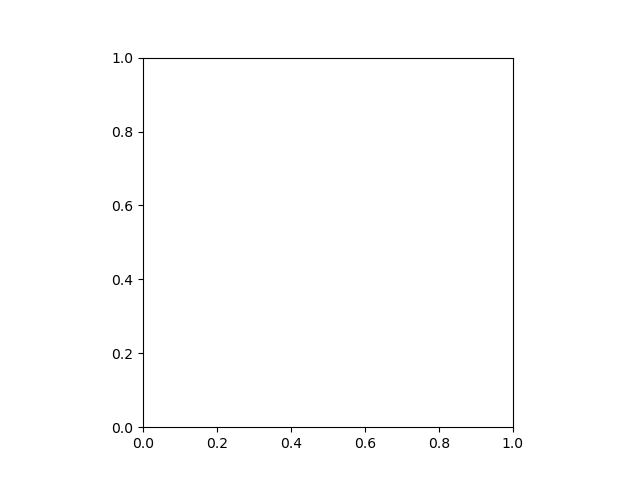

In [5]:
# Deque for axes



mag_x = deque(maxlen=HISTORY_SIZE)
mag_y = deque(maxlen=HISTORY_SIZE)
mag_z = deque(maxlen=HISTORY_SIZE)

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None
anim = None

def onClick(event):

    anim.event_source.stop()
    
def animate(i):

    for _ in range(30):
        ret = get_imu_data()
        if not ret:
            continue
        x, y, z = ret[3:6]
        mag_x.append(x)
        mag_y.append(y)
        mag_z.append(z)

    # Clear all axis
    ax.cla()

    # Display the sub-plots
    ax.scatter(mag_x, mag_y, color='r')
    ax.scatter(mag_y, mag_z, color='g')
    ax.scatter(mag_z, mag_x, color='b')
    
    if len(mag_x) == HISTORY_SIZE:
        anim.event_source.stop()
    # Pause the plot for INTERVAL seconds 
    #plt.pause(INTERVAL)

fig.canvas.mpl_connect('button_press_event', onClick)    
anim = FuncAnimation(fig, animate,interval=INTERVAL)


X range:  -83.0751 6.8693
Y range:  12.7887 101.3446
Z range:  -41.4645 44.1538
Final calibration in uTesla: [-38.102900000000005, 57.06665, 1.344649999999998]


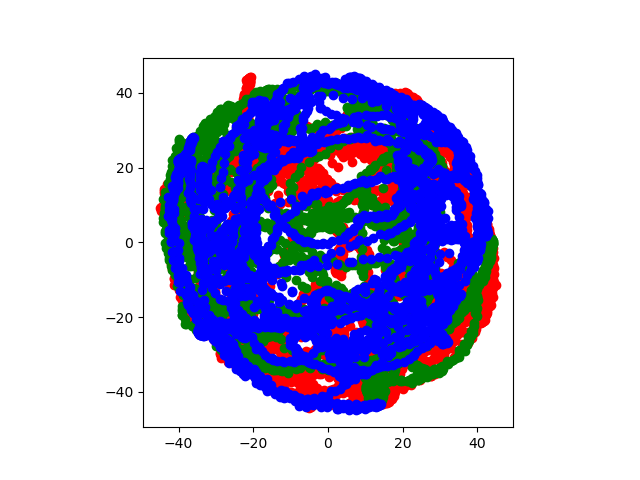

In [7]:
min_x = min(mag_x)
max_x = max(mag_x)
min_y = min(mag_y)
max_y = max(mag_y)
min_z = min(mag_z)
max_z = max(mag_z)

print("X range: ", min_x, max_x)
print("Y range: ", min_y, max_y)
print("Z range: ", min_z, max_z)

mag_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in uTesla:", mag_calibration)

cal_mag_x = [x - mag_calibration[0] for x in mag_x]
cal_mag_y = [y - mag_calibration[1] for y in mag_y]
cal_mag_z = [z - mag_calibration[2] for z in mag_z]

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# Clear all axis
ax.cla()

# Display the now calibrated data
ax.scatter(cal_mag_x, cal_mag_y, color='r')
ax.scatter(cal_mag_y, cal_mag_z, color='g')
ax.scatter(cal_mag_z, cal_mag_x, color='b')
#fig.show()

# Gyroscope offset calibration

Put down the board and do not touch or move it!
3...2...1...COLLECTING GYRO DATA
Opened COM3
Gyro X range:  -0.05 -0.0
Gyro Y range:  0.01 0.02
Gyro Z range:  -0.08 -0.0
Final calibration in rad/s: [-0.040352422907488986, 0.012014417300760914, -0.03946335602723268]


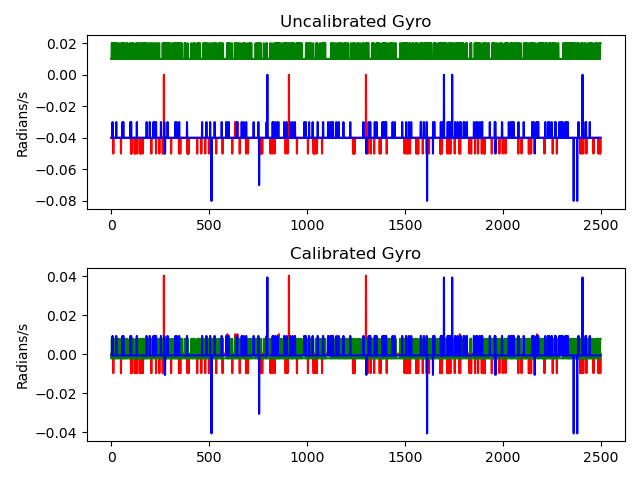

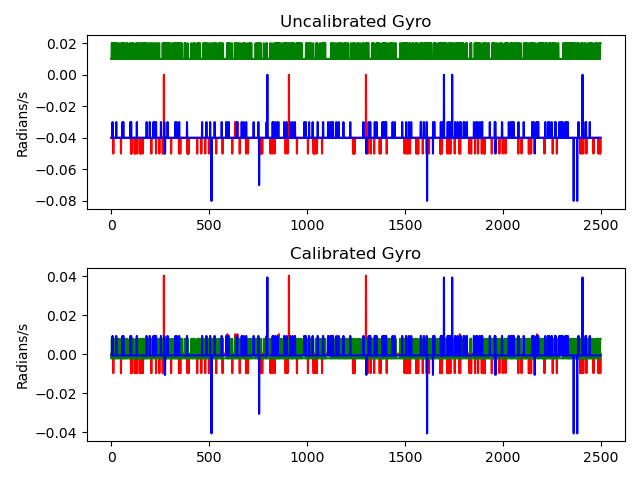

In [8]:


# How many sensor samples we want to store
HISTORY_SIZE = 25000
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING GYRO DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

# Deque for axes
gyro_x = deque(maxlen=HISTORY_SIZE//10)
gyro_y = deque(maxlen=HISTORY_SIZE//10)
gyro_z = deque(maxlen=HISTORY_SIZE//10)
while len(gyro_x) < (HISTORY_SIZE//10):
    ret = get_imu_data()
    #print(ret)
    if not ret:
        continue
    x, y, z =ret[0:3] # ret[3:6]
    gyro_x.append(x)
    gyro_y.append(y)
    gyro_z.append(z)

for _ in range(3):
    gyro_x.popleft()
    gyro_y.popleft()
    gyro_z.popleft()

min_x = min(gyro_x)
max_x = max(gyro_x)
min_y = min(gyro_y)
max_y = max(gyro_y)
min_z = min(gyro_z)
max_z = max(gyro_z)

print("Gyro X range: ", min_x, max_x)
print("Gyro Y range: ", min_y, max_y)
print("Gyro Z range: ", min_z, max_z)

# gyro_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]

gyro_calibration = [ np.mean(gyro_x) , np.mean(gyro_y), np.mean(gyro_z)]



print("Final calibration in rad/s:", gyro_calibration)

fig, (uncal, cal) = plt.subplots(2, 1)

# Clear all axis
uncal.cla()
t = np.linspace(0, len(gyro_x), len(gyro_x))
# plot uncalibrated data
uncal.plot(t, gyro_x, color='r')
uncal.plot(t, gyro_y, color='g')
uncal.plot(t, gyro_z, color='b')
uncal.title.set_text("Uncalibrated Gyro")
uncal.set(ylabel='Radians/s')
# plot calibrated data
cal.plot(t, [x - gyro_calibration[0] for x in gyro_x], color='r')
cal.plot(t, [y - gyro_calibration[1] for y in gyro_y], color='g')
cal.plot(t, [z - gyro_calibration[2] for z in gyro_z], color='b')
cal.title.set_text("Calibrated Gyro")
cal.set(ylabel='Radians/s')

fig.tight_layout()
fig.show()
serialport.close()


